# Map projections

#### Quering CRS

In [1]:
import geopandas as gpd

In [3]:
import geodatasets as gds


In [4]:
gds.data.flatten().keys()

dict_keys(['geoda.airbnb', 'geoda.atlanta', 'geoda.cars', 'geoda.charleston1', 'geoda.charleston2', 'geoda.chicago_health', 'geoda.chicago_commpop', 'geoda.chile_labor', 'geoda.cincinnati', 'geoda.cleveland', 'geoda.grid100', 'geoda.groceries', 'geoda.guerry', 'geoda.health', 'geoda.health_indicators', 'geoda.hickory1', 'geoda.hickory2', 'geoda.home_sales', 'geoda.houston', 'geoda.juvenile', 'geoda.lansing1', 'geoda.lansing2', 'geoda.lasrosas', 'geoda.liquor_stores', 'geoda.malaria', 'geoda.milwaukee1', 'geoda.milwaukee2', 'geoda.ncovr', 'geoda.natregimes', 'geoda.ndvi', 'geoda.nepal', 'geoda.nyc', 'geoda.nyc_earnings', 'geoda.nyc_education', 'geoda.nyc_neighborhoods', 'geoda.orlando1', 'geoda.orlando2', 'geoda.oz9799', 'geoda.phoenix_acs', 'geoda.police', 'geoda.sacramento1', 'geoda.sacramento2', 'geoda.savannah1', 'geoda.savannah2', 'geoda.seattle1', 'geoda.seattle2', 'geoda.sids', 'geoda.sids2', 'geoda.south', 'geoda.spirals', 'geoda.stlouis', 'geoda.tampa1', 'geoda.us_sdoh', 'ny.bb

In [5]:
nybb_path = get_path('nybb')
world_path = get_path('naturalearth.land')

In [6]:
nybb = gpd.read_file(nybb_path)
world = gpd.read_file(world_path)

In [7]:
nybb.head(3)

,BoroCode,BoroName,Shape_Leng,Shape_Area,geometry
0,5,Staten Island,330470.010332,1.623820e+09,"MULTIPOLYGON (((970217.022 145643.332, 970227...."
1,4,Queens,896344.047763,3.045213e+09,"MULTIPOLYGON (((1029606.077 156073.814, 102957..."
2,3,Brooklyn,741080.523166,1.937479e+09,"MULTIPOLYGON (((1021176.479 151374.797, 102100..."


In [8]:
world.head(3)

,featurecla,scalerank,min_zoom,geometry
0,Land,1,1.0,"POLYGON ((-59.57209 -80.04018, -59.86585 -80.5..."
1,Land,1,1.0,"POLYGON ((-159.20818 -79.49706, -161.1276 -79...."
2,Land,1,0.0,"POLYGON ((-45.15476 -78.04707, -43.92083 -78.4..."


In [15]:
# coordinate reference system
print(nybb.crs)
print(world.crs)

EPSG:2263
EPSG:4326


In [17]:
# 2263 is for New York, 4326 is for the World - generic

In [18]:
nybb.crs

<Projected CRS: EPSG:2263>
Name: NAD83 / New York Long Island (ftUS)
Axis Info [cartesian]:
- X[east]: Easting (US survey foot)
- Y[north]: Northing (US survey foot)
Area of Use:
- name: United States (USA) - New York - counties of Bronx; Kings; Nassau; New York; Queens; Richmond; Suffolk.
- bounds: (-74.26, 40.47, -71.8, 41.3)
Coordinate Operation:
- name: SPCS83 New York Long Island zone (US Survey feet)
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [19]:
world.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

#### Global and local CRS

In [20]:
world_nyc = world.to_crs('2263')

In [21]:
print(world_nyc.crs)

EPSG:2263


In [22]:
world_nyc.head(3)

,featurecla,scalerank,min_zoom,geometry
0,Land,1,1.0,"POLYGON ((33456212.348 -170880114.794, 3391780..."
1,Land,1,1.0,"POLYGON ((-157069246.257 -83199513.634, -16078..."
2,Land,1,0.0,"POLYGON ((57783898.135 -141725695.483, 6156707..."


<Axes: >

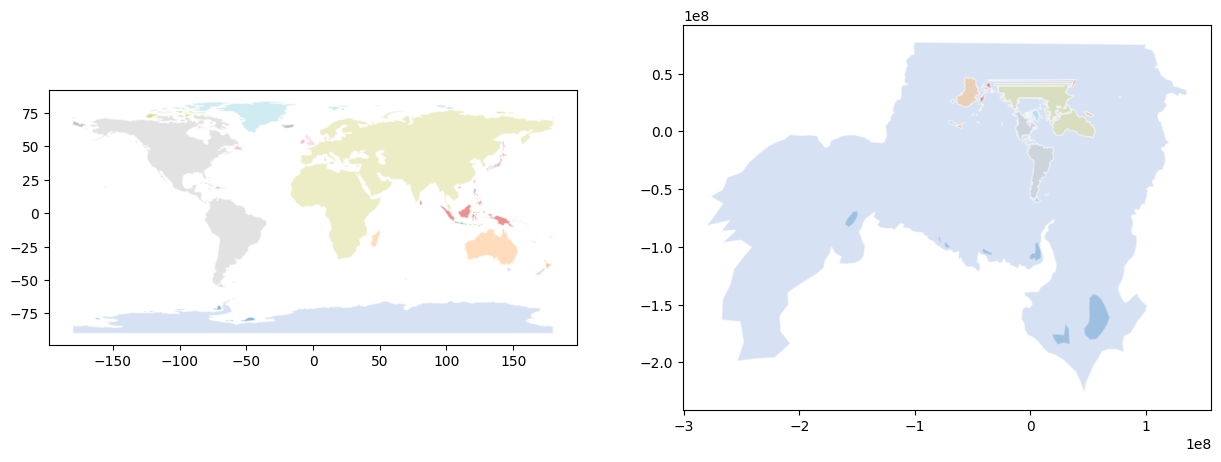

In [23]:
import matplotlib.pyplot as plt

f, ax = plt.subplots(1,2,figsize=(15,7))

world.plot(ax=ax[0], edgecolor = 'w', cmap = 'tab20', alpha = 0.5, linewidth = 1)

world_nyc.plot(ax=ax[1], edgecolor = 'w', cmap = 'tab20', alpha = 0.5, linewidth = 1)
